In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
def load_data(path):
    data = loadmat(path)
    X = data['X']
    y = data['y']
    return X,y

In [3]:
X, y = load_data('ex3/ex3data1')
X = np.hstack([np.array([[1]*len(X)]).T, X])
X.shape, y.shape

((5000, 401), (5000, 1))

In [5]:
label = np.unique(y)
label

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(np.dot(X, theta.T))

def reg_cost(X, y, theta, lamda):
    return  ((np.sum((-y) * np.log(h(X, theta)) + (y-1) * np.log(1-h(X, theta)))) / len(X)) + ((lamda/len(X)) * theta.T[1:].T @ theta.T[1:]).squeeze()

def reg_gradient(X, y, theta, lamda):
    return ((np.dot(X.T, sigmoid(h(X, theta) - y))) / len(X)).T - np.concatenate([np.array([[0]]), (lamda / len(X)) * theta.T[1:]]).T

def cost(X, y, theta):
    h = sigmoid(np.dot(X, theta.T))
    _sum = np.sum((-y * np.log(h)) + ((y - 1) * np.log(1 - h)))
    return _sum / len(X)

def gradient(X, y, theta):
    return (np.dot(X.T, sigmoid(np.dot(X, theta.T)) - y) / len(X)).T

def GD(X, y, theta, alpha, epoch, label=None, lamda=0.01):
    temp = np.array([[0]*theta.shape[1]])
    _cost = []
    m = X.shape[0]
    
    for i in range(epoch):
        temp = theta - ((alpha / m) * gradient(X, y, theta))
        theta = temp
        c = cost(X, y, theta)
        _cost.append(c)
        
        if i % (epoch//10) == 0:
            if label != None: print('label:', label, 'epoch:', i, 'cost:', c)
            else: print('epoch:', i, 'cost:', c)
    
    return theta, _cost

In [7]:
theta = np.zeros(X.shape[1]).reshape(X.shape[1], -1).T
theta.shape

(1, 401)

In [8]:
y_one = np.array([1 if label == 1 else 0 for label in y]).reshape(5000, 1)

In [9]:
cost(X, y_one, theta)

0.6931471805599454

In [10]:
gradient(X, y_one, theta).shape

(1, 401)

In [14]:
alpha = 0.8
epoch = 10000
f_theta, _cost = GD(X, y_one, theta, alpha, epoch)

epoch: 0 cost: 0.6925731005809886
epoch: 1000 cost: 0.39828863785228724
epoch: 2000 cost: 0.3134185742797392
epoch: 3000 cost: 0.2765332043983766
epoch: 4000 cost: 0.25568225290561347
epoch: 5000 cost: 0.24166102651550292
epoch: 6000 cost: 0.23105742612049404
epoch: 7000 cost: 0.22238325282914756
epoch: 8000 cost: 0.21491230687270982
epoch: 9000 cost: 0.208259465025825


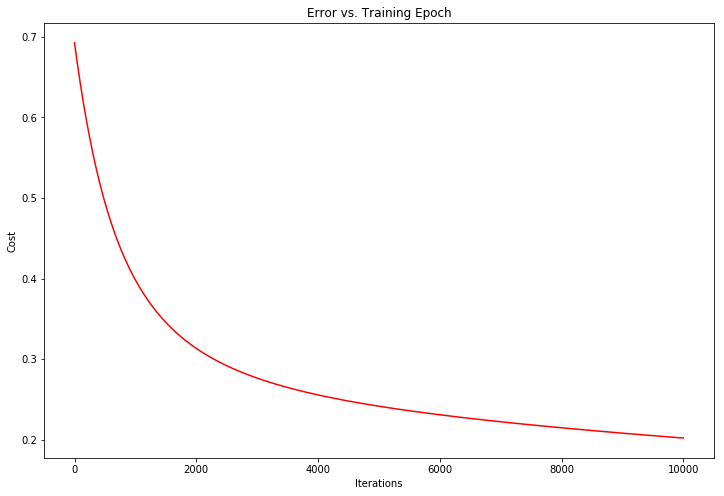

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch), _cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [16]:
K_theta = []
alpha = 0.5
epoch = 10000

for i in range(1, len(label) + 1):
    theta = np.zeros(X.shape[1]).reshape(X.shape[1], -1).T
    y_i = np.array([1 if label == i else 0 for label in y]).reshape(5000, 1)
    
    f_theta, _cost = GD(X, y_i, theta, alpha, epoch, i)
    K_theta.append(f_theta)


label: 1 epoch: 0 cost: 0.6927883262884715
label: 1 epoch: 1000 cost: 0.46409934993711915
label: 1 epoch: 2000 cost: 0.36849837414802994
label: 1 epoch: 3000 cost: 0.3202445147755296
label: 1 epoch: 4000 cost: 0.2919359885862342
label: 1 epoch: 5000 cost: 0.2733531006390731
label: 1 epoch: 6000 cost: 0.26005743028159994
label: 1 epoch: 7000 cost: 0.2498814158460664
label: 1 epoch: 8000 cost: 0.24166833689996683
label: 1 epoch: 9000 cost: 0.23475735065937506
label: 2 epoch: 0 cost: 0.6928483800389628
label: 2 epoch: 1000 cost: 0.5022232124212098
label: 2 epoch: 2000 cost: 0.4233147439297985
label: 2 epoch: 3000 cost: 0.3845205965286121
label: 2 epoch: 4000 cost: 0.3624303032381918
label: 2 epoch: 5000 cost: 0.34826725433231154
label: 2 epoch: 6000 cost: 0.33825600265324246
label: 2 epoch: 7000 cost: 0.3305887954457607
label: 2 epoch: 8000 cost: 0.3243270182653761
label: 2 epoch: 9000 cost: 0.3189522815576739
label: 3 epoch: 0 cost: 0.6928494636688718
label: 3 epoch: 1000 cost: 0.5027612

In [17]:
K_theta = np.array(K_theta).squeeze()

In [18]:
K_theta.shape

(10, 401)

In [19]:
def predict_all(X, all_theta): 
    h = sigmoid(X @ all_theta.T)
    h_argmax = np.argmax(h, axis=1)
    h_argmax = h_argmax + 1
    return h_argmax

raw_X, raw_y = load_data('ex3/ex3data1')
X = np.insert(raw_X, 0, 1, axis=1)
y = raw_y.flatten()

y_pred = predict_all(X, K_theta)
accuracy = np.mean(y_pred == y)
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 77.3%
